In [ ]:
Информация о наборе данных:

Набор данных состоит из уровней экспрессии 77 белков/белковых модификаций, которые продуцируют обнаруживаемые сигналы в
ядерной фракции коры. Существует 38 контрольных мышей и 34 трисомных мыши (синдром Дауна), в общей сложности 72 мыши. В
экспериментах было зарегистрировано 15 измерений каждого белка на образец/мышь. Поэтому для контрольных мышей имеется
38×15 или 570 измерений, а для трисомных мышей - 34×15 или 510 измерений. Набор данных содержит в общей сложности 1080
измерений на белок. Каждое измерение можно рассматривать как независимый образец/мышь. 


Восемь классов мышей описаны на основе таких особенностей, как генотип, поведение и лечение. Согласно генотипу, мыши могут быть
контролирующими или трисомическими. Согласно поведению, некоторые мыши были вынуждены учиться (context-shock), а другие не имеют
(shock-context), и для того, чтобы оценить влияние лекарственного мемантина на восстановление способности учиться у
трисоматических мышей, некоторые мыши были инъекции наркотиков, а у других нет. 


Классы: 

c-CS-s: контрольные мыши, стимулированные к обучению, инъецированные физиологическим раствором (9 мышей) 
    
c-CS-m: контрольные мыши, стимулированные к обучению, инъецированные мемантином (10 мышей) 
    
c-SC-s: контрольные мыши, не стимулированные к обучению, инъецированные физиологическим раствором (9 мышей) 
    
c-SC-m: контрольные мыши, не стимулированные к обучению, инъецированные мемантином (10 мышей) 

t-CS-s: трисомические мыши, стимулированные для изучения, инъецированные физиологическим раствором (7 мышей) 
    
t-CS-m: трисомические мыши, стимулированные для изучения, инъецированным мемантином (9 мышей) 
    
t-SC-s: трисомические мыши, не стимулированные к обучению, инъецированные физиологическим раствором (9 мышей) 
    
t-SC-m: трисомические мыши, не стимулированные к обучению, инъецированные мемантином (9 мышей) 

    
Цель состоит в том, чтобы идентифицировать подмножества белков, которые являются дискриминантами между классами. 


Информация об столбцах:
1 ID мыши 
2..78 Значения уровней экспрессии 77 белков; за именами белков следуют «_n» что они были измерены в ядерной фракции.
Например: DYRK1A_n 
79 Генотип: контроль (c) или трисомия (t) 
80 Тип лечения: мемантин (m) или физиологический раствор (s) 
81 Поведение: context-shock (CS) или shock-context (SC) 
82 Класс: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [138]:
# загрузка данных
url = 'https://github.com/OlyaKotova/MachineLearning/tree/master/Data_Cortex_Nuclear(csv).csv'
#data = pd.read_csv(url, sep = ',', engine='python')
data = pd.read_csv(url, sep = ',', engine = 'python')

In [43]:
# вывод тип данных
type(data)

pandas.core.frame.DataFrame

In [47]:
# вывод первых пяти строк
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [20]:
# последние пять строк
data.tail()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s
1079,J3295_15,0.302626,0.461059,0.256564,2.092790,2.594348,0.251001,0.191811,2.361816,0.223632,...,0.187556,0.420347,0.335062,0.252995,0.365278,1.370999,Ts65Dn,Saline,S/C,t-SC-s


In [21]:
# кол-во строк и столбцов
print(data.shape)
# вывод названия всех признаков (столбцов)
print(data.columns)

(1080, 82)
Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [22]:
data.index

RangeIndex(start=0, stop=1080, step=1)

In [5]:
# вывод значения столбца 'class', 12 строчки
data.at[12, 'class']

'c-CS-m'

In [4]:
# вывод столбца 'class'
data['class']

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
5       c-CS-m
6       c-CS-m
7       c-CS-m
8       c-CS-m
9       c-CS-m
10      c-CS-m
11      c-CS-m
12      c-CS-m
13      c-CS-m
14      c-CS-m
15      c-CS-m
16      c-CS-m
17      c-CS-m
18      c-CS-m
19      c-CS-m
20      c-CS-m
21      c-CS-m
22      c-CS-m
23      c-CS-m
24      c-CS-m
25      c-CS-m
26      c-CS-m
27      c-CS-m
28      c-CS-m
29      c-CS-m
         ...  
1050    t-SC-s
1051    t-SC-s
1052    t-SC-s
1053    t-SC-s
1054    t-SC-s
1055    t-SC-s
1056    t-SC-s
1057    t-SC-s
1058    t-SC-s
1059    t-SC-s
1060    t-SC-s
1061    t-SC-s
1062    t-SC-s
1063    t-SC-s
1064    t-SC-s
1065    t-SC-s
1066    t-SC-s
1067    t-SC-s
1068    t-SC-s
1069    t-SC-s
1070    t-SC-s
1071    t-SC-s
1072    t-SC-s
1073    t-SC-s
1074    t-SC-s
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [6]:
# вывод значения столбца 'class', 12 строчки. Другой способ
data['class'][12]

'c-CS-m'

In [7]:
# вывод типа данных столбца 'class'
data['class'].dtype.name

'object'

In [8]:
# вывод типа данных столбца 'class', 12 строчки
type(data['class'][12])

str

In [9]:
type(data['class'])

pandas.core.series.Series

In [11]:
# вывод первых записей столбцов 'Genotype' и 'class'
data[['Genotype', 'class']].head()

,Genotype,class
0,Control,c-CS-m
1,Control,c-CS-m
2,Control,c-CS-m
3,Control,c-CS-m
4,Control,c-CS-m


In [6]:
# вывод основных статистических характеристик данных по количественным признакам
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [7]:
# вывод корелляции между признаками
data.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.959512,0.359433,0.294526,0.325063,-0.180959,-0.093737,-0.180169,0.047299,0.791173,...,-0.199363,-0.253175,-0.167358,-0.326577,-0.228488,-0.047246,-0.384816,-0.323397,-0.473734,0.476033
ITSN1_N,0.959512,1.000000,0.459884,0.422492,0.426182,-0.147775,-0.076507,-0.132870,0.171122,0.780926,...,-0.200833,-0.327136,-0.257745,-0.256573,-0.309593,0.042422,-0.347339,-0.399856,-0.511433,0.517782
BDNF_N,0.359433,0.459884,1.000000,0.805784,0.749993,0.317537,0.390530,0.246760,0.603857,0.451598,...,-0.080776,-0.186508,-0.146526,0.127703,-0.254218,0.450433,-0.135637,-0.239907,-0.244732,0.262578
NR1_N,0.294526,0.422492,0.805784,1.000000,0.873889,0.211540,0.244224,0.301151,0.597443,0.416629,...,-0.141423,-0.386577,-0.321790,0.264181,-0.374932,0.473366,-0.234171,-0.319672,-0.351958,0.205463
NR2A_N,0.325063,0.426182,0.749993,0.873889,1.000000,0.110172,0.111143,0.280733,0.392695,0.409502,...,-0.259166,-0.449268,-0.297453,0.262492,-0.434530,0.400526,-0.314210,-0.346987,-0.454366,0.187292
pAKT_N,-0.180959,-0.147775,0.317537,0.211540,0.110172,1.000000,0.825140,0.457168,0.597112,0.037529,...,0.144520,0.350181,0.285077,0.300589,0.053823,0.248531,0.338456,0.280476,0.383404,-0.238567
pBRAF_N,-0.093737,-0.076507,0.390530,0.244224,0.111143,0.825140,1.000000,0.372212,0.586992,0.117038,...,0.134769,0.372427,0.343826,0.258775,0.148139,0.284492,0.301049,0.349281,0.402397,-0.213691
pCAMKII_N,-0.180169,-0.132870,0.246760,0.301151,0.280733,0.457168,0.372212,1.000000,0.404463,-0.083020,...,0.044634,0.072399,0.006139,0.390340,-0.065067,0.244965,0.193369,0.079262,0.065615,-0.375797
pCREB_N,0.047299,0.171122,0.603857,0.597443,0.392695,0.597112,0.586992,0.404463,1.000000,0.212314,...,0.065719,-0.051961,-0.081264,0.302119,-0.177704,0.413060,0.235879,-0.117623,0.056099,0.039517
pELK_N,0.791173,0.780926,0.451598,0.416629,0.409502,0.037529,0.117038,-0.083020,0.212314,1.000000,...,-0.196473,-0.191688,-0.070634,-0.155642,-0.175796,0.039426,-0.259559,-0.202839,-0.277555,0.233863


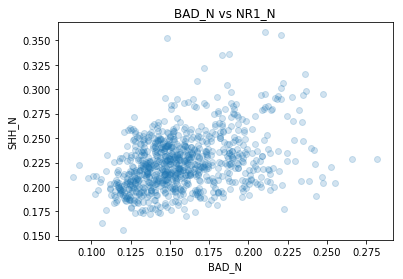

In [13]:
# график зависимости между двумя белками
plt.plot(data['BAD_N'], data['SHH_N'], 'o', alpha = 0.2)
plt.xlabel('BAD_N')
plt.ylabel('SHH_N')
plt.title('BAD_N vs NR1_N')
pass

In [20]:
# вывод всех генотипов которые указывают является ли мышь контрольной или нет
data['Genotype'] == 'Ts65Dn'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1050     True
1051     True
1052     True
1053     True
1054     True
1055     True
1056     True
1057     True
1058     True
1059     True
1060     True
1061     True
1062     True
1063     True
1064     True
1065     True
1066     True
1067     True
1068     True
1069     True
1070     True
1071     True
1072     True
1073     True
1074     True
1075     True
1076     True
1077     True
1078     True
1079     True
Name: Genotype, Length: 1080, dtype: bool

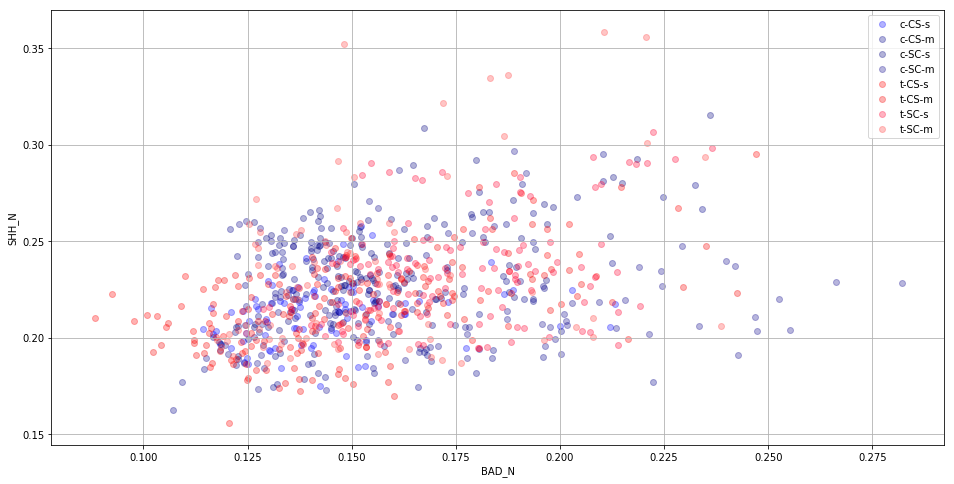

In [43]:
# зависимость двух белков от генотипа
# c-CS-s, c-CS-m, c-SC-s, c-SC-m - контрольные мыши
# t-CS-s, t-CS-m, t-SC-s, t-SC-m - с синдромом
plt.figure(figsize = (16, 8))

plt.scatter(data[data['class'] == 'c-CS-s']['BAD_N'],
            data[data['class'] == 'c-CS-s']['SHH_N'],
            alpha = 0.3,
            label = 'c-CS-s',
            color = '#0000ff')
plt.scatter(data[data['class'] == 'c-CS-m']['BAD_N'],
            data[data['class'] == 'c-CS-m']['SHH_N'],
            alpha = 0.3,
            label = 'c-CS-m',
            color = '#00008b')
plt.scatter(data[data['class'] == 'c-SC-s']['BAD_N'],
            data[data['class'] == 'c-SC-s']['SHH_N'],
            alpha = 0.3,
            label = 'c-SC-s',
            color = '#000080')
plt.scatter(data[data['class'] == 'c-SC-m']['BAD_N'],
            data[data['class'] == 'c-SC-m']['SHH_N'],
            alpha = 0.3,
            label = 'c-SC-m',
            color = '#120a8f')

plt.scatter(data[data['class'] == 't-CS-s']['BAD_N'],
            data[data['class'] == 't-CS-s']['SHH_N'],
            alpha = 0.3,
            label = 't-CS-s',
            color = '#ff0000')
plt.scatter(data[data['class'] == 't-CS-m']['BAD_N'],
            data[data['class'] == 't-CS-m']['SHH_N'],
            alpha = 0.3,
            label = 't-CS-m',
            color = '#f80000')
plt.scatter(data[data['class'] == 't-SC-s']['BAD_N'],
            data[data['class'] == 't-SC-s']['SHH_N'],
            alpha = 0.3,
            label = 't-SC-s',
            color = '#ff0033')
plt.scatter(data[data['class'] == 't-SC-m']['BAD_N'],
            data[data['class'] == 't-SC-m']['SHH_N'],
            alpha = 0.3,
            label = 't-SC-m',
            color = '#ff4040')

plt.xlabel('BAD_N')
#plt.xticks(range(18))
#plt.xlim(0.05, 0.3)
plt.ylabel('SHH_N')
plt.legend()
plt.grid()

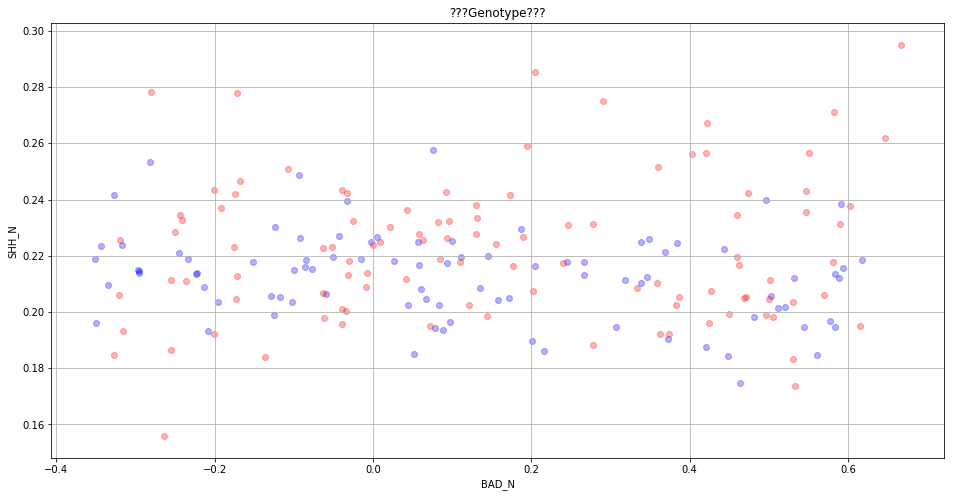

In [44]:
np.random.seed(0)
education_num_rnd = data['BAD_N'] + np.random.rand(data.shape[0]) - 0.5

plt.figure(figsize = (16, 8))

plt.scatter(education_num_rnd[data['class'] == 'c-CS-s'],
            data[data['class'] == 'c-CS-s']['SHH_N'],
            alpha = 0.3,
            label = 'c-CS-s',
            color = 'b')

plt.scatter(education_num_rnd[data['class'] == 't-CS-s'],
            data[data['class'] == 't-CS-s']['SHH_N'],
            alpha = 0.3,
            label = 't-CS-s',
            color = 'r')

plt.xlabel('BAD_N')
#plt.xticks(range(1))
#plt.xlim(0, 17)
plt.ylabel('SHH_N')
plt.title('???Genotype???')
plt.grid()

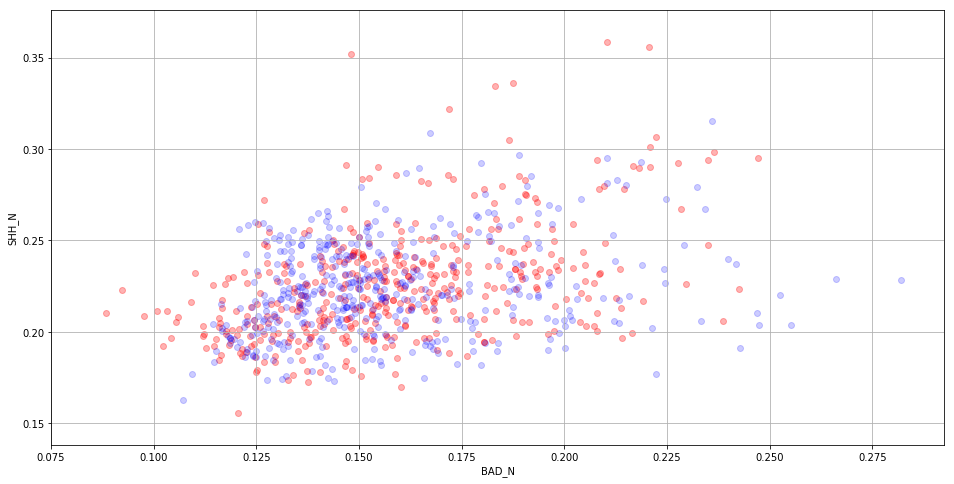

In [58]:
plt.figure(figsize = (16, 8))

plt.scatter(data[data['Genotype'] == 'Ts65Dn']['BAD_N'],
            data[data['Genotype'] == 'Ts65Dn']['SHH_N'],
            alpha = 0.3,
            label = 'Ts65Dn',
            color = 'r')

plt.scatter(data[data['Genotype'] == 'Control']['BAD_N'],
            data[data['Genotype'] == 'Control']['SHH_N'],
            alpha = 0.2,
            label = 'Control',
            color = 'b')

plt.xlabel('BAD_N')
plt.ylabel('SHH_N')
plt.grid()

In [59]:
# вывод всех столбцов типа "обект"
data.describe(include = ['object'])

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,3488_13,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


In [45]:
# вывод информации по всем признакам
data.describe(include = 'all')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
count,1080,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000,1080,1080,1080,1080
unique,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,8
top,3490_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Memantine,S/C,c-SC-m
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,570,570,555,150
mean,NaN,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,...,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784,NaN,NaN,NaN,NaN
std,NaN,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,...,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126,NaN,NaN,NaN,NaN
min,NaN,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,...,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479,NaN,NaN,NaN,NaN
25%,NaN,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,...,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423,NaN,NaN,NaN,NaN
50%,NaN,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,...,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441,NaN,NaN,NaN,NaN
75%,NaN,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,...,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824,NaN,NaN,NaN,NaN


In [40]:
# вывод всех значений столбца 'class'
data['class'].unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [63]:
# вывод всех значений столбца 'Treatment'
data['Treatment'].unique()

array(['Memantine', 'Saline'], dtype=object)

In [41]:
# вывод всех комбинций значений столбца 'Treatment' и 'class' присутствующих в таблице
for name in data['class'].unique():
    print(name, data['Treatment'][data['class'] == name].iloc[0])

c-CS-m Memantine
c-SC-m Memantine
c-CS-s Saline
c-SC-s Saline
t-CS-m Memantine
t-SC-m Memantine
t-CS-s Saline
t-SC-s Saline


In [67]:
# вывод всех значений столбца 'Genotype'
data['Genotype'].unique()

array(['Control', 'Ts65Dn'], dtype=object)

## Задача

Genotype, Treatment, Behavior и class "совпадают"

MouseID является только нумерацией

In [1]:
# удаление столбцов
data = data.drop('Genotype', axis = 1)\
            .drop('Treatment', axis = 1).drop('Behavior', axis = 1)
data = data.drop('MouseID', axis = 1)
data = data.drop('pCFOS_N', axis = 1) # много пропущеных значений, можно считать не существенным признаком

In [199]:
# проверка что всё плучилось
data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.129468,0.106305,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.129468,0.106592,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.129468,0.108303,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.129468,0.103184,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.129468,0.104784,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,0.129468,0.106476,0.439833,0.116657,0.140766,0.142180,1.816389,c-CS-m
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,0.129468,0.097834,0.406293,0.137229,0.156682,0.157499,1.528484,c-CS-m
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.191561,0.141013,0.129468,0.099494,0.382532,0.123376,0.155612,0.159409,1.652658,c-CS-m
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.186378,0.139589,0.129468,0.105145,0.435687,0.125173,0.152711,0.158235,1.834599,c-CS-m
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.189523,0.183678,0.129468,0.093300,0.414793,0.146133,0.188849,0.192334,1.516862,c-CS-m


In [68]:
# другой способ (у меня не работал)
#data.drop(['Genotype', 'Treatment', 'Behavior'], axis = 1)

## Готовим данные

In [51]:
data['class'].dtype.name

'object'

In [200]:
# запоминаем все категориальные и числовые столбци
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['class']
['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']


In [53]:
# вывод всех значений категорилаьных столбцов которые мы запомнили
for c in categorical_columns:
    print(c, data[c].unique())

class ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


## Обрабатываем пропущенные значения

In [201]:
# вывод средних значений по столбцам
data.median(axis = 0)

DYRK1A_N           0.366378
ITSN1_N            0.565782
BDNF_N             0.316564
NR1_N              2.296546
NR2A_N             3.760855
pAKT_N             0.231177
pBRAF_N            0.182302
pCAMKII_N          3.326520
pCREB_N            0.210594
pELK_N             1.355846
pERK_N             0.443644
pJNK_N             0.321330
PKCA_N             0.312977
pMEK_N             0.277393
pNR1_N             0.821076
pNR2A_N            0.719591
pNR2B_N            1.563696
pPKCAB_N           1.365744
pRSK_N             0.440598
AKT_N              0.682469
BRAF_N             0.326658
CAMKII_N           0.360260
CREB_N             0.179580
ELK_N              1.096186
ERK_N              2.401462
GSK3B_N            1.159822
JNK_N              0.244947
MEK_N              0.273361
TRKA_N             0.704964
RSK_N              0.166692
                     ...   
pPKCG_N            1.664560
CDK5_N             0.293820
S6_N               0.400999
ADARB1_N           1.128255
AcetylH3K9_N       0

In [202]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [203]:
# вывод количства строк всех признаков
# пропущенные значения отсутствуют
data[numerical_columns].count(axis = 0)

DYRK1A_N           1080
ITSN1_N            1080
BDNF_N             1080
NR1_N              1080
NR2A_N             1080
pAKT_N             1080
pBRAF_N            1080
pCAMKII_N          1080
pCREB_N            1080
pELK_N             1080
pERK_N             1080
pJNK_N             1080
PKCA_N             1080
pMEK_N             1080
pNR1_N             1080
pNR2A_N            1080
pNR2B_N            1080
pPKCAB_N           1080
pRSK_N             1080
AKT_N              1080
BRAF_N             1080
CAMKII_N           1080
CREB_N             1080
ELK_N              1080
ERK_N              1080
GSK3B_N            1080
JNK_N              1080
MEK_N              1080
TRKA_N             1080
RSK_N              1080
                   ... 
pPKCG_N            1080
CDK5_N             1080
S6_N               1080
ADARB1_N           1080
AcetylH3K9_N       1080
RRP1_N             1080
BAX_N              1080
ARC_N              1080
ERBB4_N            1080
nNOS_N             1080
Tau_N           

## Векторизация

In [207]:
# вывод всех не бинарных и бинарных признаков
# бинарные признаки отсутсвуют
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['class']


In [209]:
#no binary columns

In [212]:
#data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print(data_nonbinary.columns)

## Нормализация количественных признаков

In [213]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425645,0.616959,0.319081,2.297267,3.843703,0.233163,0.181848,3.536524,0.212568,1.428480,...,0.848767,0.226676,0.156810,0.133365,0.121521,0.446073,0.167714,0.181540,0.202578,1.337784
std,0.249035,0.251304,0.049315,0.346810,0.931812,0.041577,0.027004,1.293415,0.032542,0.466270,...,0.094311,0.028989,0.026555,0.023635,0.014276,0.066432,0.054387,0.036406,0.048324,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.577397,0.155869,0.088305,0.080657,0.067254,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.793739,0.206395,0.141045,0.119986,0.110839,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.849858,0.224000,0.152313,0.129468,0.121626,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.916173,0.241655,0.167584,0.139331,0.131955,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,1.204598,0.358289,0.282016,0.261506,0.158748,0.759588,0.479763,0.360692,0.413903,2.129791


In [214]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [215]:
data_numerical.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,...,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03
mean,-2.618070e-15,1.693604e-15,2.940035e-17,-9.825371e-15,-2.498619e-15,-9.889363e-15,-4.414576e-15,1.628738e-15,1.969515e-15,5.769356e-15,...,-2.083107e-15,-8.085302e-15,1.046447e-14,3.510032e-14,2.754330e-15,2.591548e-16,-8.378072e-15,1.934337e-14,7.473035e-15,-1.496784e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.125620e+00,-1.478688e+00,-4.134677e+00,-2.786647e+00,-2.260287e+00,-4.087062e+00,-4.362428e+00,-1.695145e+00,-3.065487e+00,-2.143495e+00,...,-2.877382e+00,-2.442552e+00,-2.579755e+00,-2.230121e+00,-3.801115e+00,-2.821633e+00,-1.618464e+00,-2.087644e+00,-2.085730e+00,-2.369104e+00
25%,-5.520611e-01,-5.701875e-01,-6.373547e-01,-6.865861e-01,-7.334270e-01,-6.576204e-01,-6.380062e-01,-8.169560e-01,-6.680856e-01,-4.763128e-01,...,-5.834626e-01,-6.996107e-01,-5.936454e-01,-5.660502e-01,-7.482217e-01,-7.224012e-01,-6.204624e-01,-6.145149e-01,-5.857823e-01,-8.083876e-01
50%,-2.379889e-01,-2.036479e-01,-5.104231e-02,-2.079481e-03,-8.891040e-02,-4.776419e-02,1.683113e-02,-1.623642e-01,-6.066392e-02,-1.557766e-01,...,1.157483e-02,-9.233720e-02,-1.693231e-01,-1.648679e-01,7.399257e-03,3.591022e-02,-1.741979e-01,-1.814272e-01,-1.776452e-01,-6.414768e-02
75%,2.486750e-01,3.204914e-01,5.872000e-01,6.654013e-01,6.239492e-01,5.787391e-01,5.694831e-01,7.299499e-01,6.757238e-01,2.840649e-01,...,7.147236e-01,5.167114e-01,4.057328e-01,2.524411e-01,7.308988e-01,6.728679e-01,3.577895e-01,4.008419e-01,3.448409e-01,7.821488e-01
max,8.395304e+00,7.901581e+00,3.611070e+00,4.210880e+00,4.978310e+00,7.357187e+00,5.007237e+00,3.036570e+00,2.878717e+00,1.004754e+01,...,3.772943e+00,4.540073e+00,4.715026e+00,5.421750e+00,2.607576e+00,4.719332e+00,5.737555e+00,4.920928e+00,4.373067e+00,2.497451e+00


## Соединяем все в одну таблицу

In [216]:
print(nonbinary_columns)

['class']


In [217]:
data['class'].unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [131]:
#data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
#print(data.shape)
#print data.columns

(1080, 77)


In [218]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425645,0.616959,0.319081,2.297267,3.843703,0.233163,0.181848,3.536524,0.212568,1.428480,...,0.848767,0.226676,0.156810,0.133365,0.121521,0.446073,0.167714,0.181540,0.202578,1.337784
std,0.249035,0.251304,0.049315,0.346810,0.931812,0.041577,0.027004,1.293415,0.032542,0.466270,...,0.094311,0.028989,0.026555,0.023635,0.014276,0.066432,0.054387,0.036406,0.048324,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.577397,0.155869,0.088305,0.080657,0.067254,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.793739,0.206395,0.141045,0.119986,0.110839,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.849858,0.224000,0.152313,0.129468,0.121626,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.916173,0.241655,0.167584,0.139331,0.131955,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,1.204598,0.358289,0.282016,0.261506,0.158748,0.759588,0.479763,0.360692,0.413903,2.129791


## X и y

In [219]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns

In [220]:
type(feature_names)

pandas.core.indexes.base.Index

In [221]:
feature_names

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')

In [222]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1080, 76)
(1080,)


In [223]:
type(X)

pandas.core.frame.DataFrame

In [224]:
type(y)

pandas.core.series.Series

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

756 324


In [226]:
756+324

1080

## KNN

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [229]:
# осуществим классификацию и вычислим значение ошибки
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.116402116402 0.163580246914


In [230]:
# другой способ
err_test = 1 - knn.score(X_test, y_test)

In [231]:
err_test

0.1635802469135802

In [232]:
# вывод матрици, которая позволяет визуализировать прогнозы классификатора
# Элемент матрицы (i, j) равна числу объектов, которые, принадлежат группе i, но, по прогнозам, находятся в группе j.

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[47  0  0  0  0  0  0  0]
 [ 8 40  1  0  0  0  0  0]
 [ 0  0 40  0  0  0  2  0]
 [ 0  0  0 42  0  0  2  0]
 [ 1  1  0  0 25  2  0  2]
 [ 9  0  0  0  5 19  0  0]
 [ 0  0  6 12  0  0 20  0]
 [ 0  0  1  0  0  0  1 38]]


In [233]:
# подбор параметров
# вывод значения параметра k, при котором значения ошибки будет минимальным.
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.026455026455 1


In [234]:
# Осуществим классификацию при k=1, вычислим значение ошибки еще раз

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.0246913580247
